Scaled features loaded successfully.
Scaled features shape: (18875, 14)
Scaled features columns: ['cat__Type of Travel_Personal Travel', 'cat__Class_Eco', 'remainder__id', 'remainder__Age', 'remainder__Flight Distance', 'remainder__Inflight wifi service', 'remainder__Ease of Online booking', 'remainder__Online boarding', 'remainder__Seat comfort', 'remainder__Inflight entertainment', 'remainder__On-board service', 'remainder__Leg room service', 'remainder__Cleanliness', 'Comfort_Per_Mile']
Target loaded successfully.
Target shape: (18875, 1)
Target columns: ['remainder__satisfaction_encoded']
Features and target are aligned.

Summary Statistics of Scaled Features:
       cat__Type of Travel_Personal Travel  cat__Class_Eco  remainder__id  \
count                         1.887500e+04    1.887500e+04   1.887500e+04   
mean                         -3.322140e-17   -1.293094e-16   2.258679e-17   
std                           1.000026e+00    1.000026e+00   1.000026e+00   
min                

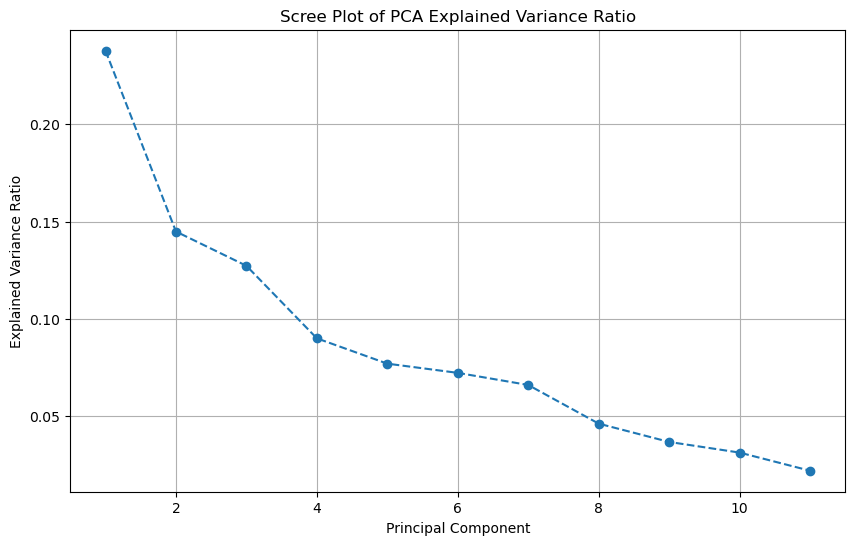

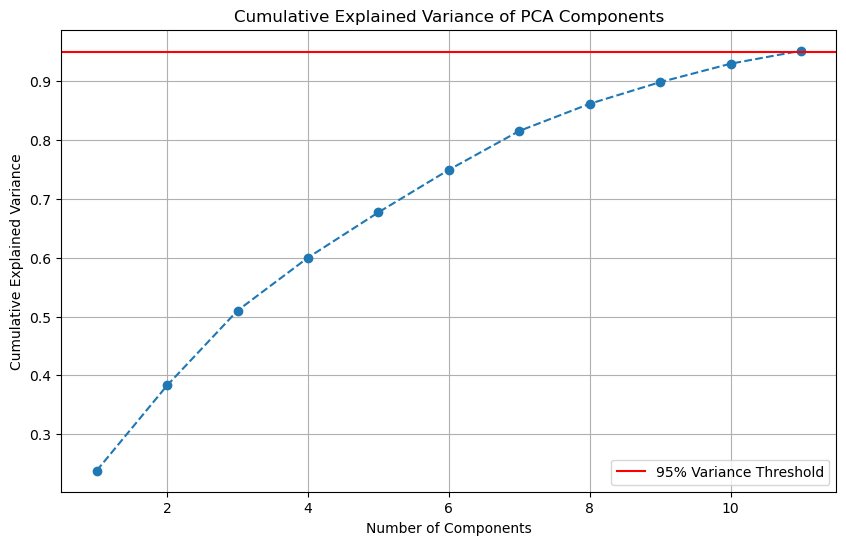

File saved successfully: C:\Users\dinu9\Desktop\AI_AirTicket\reduced_features.csv


In [10]:
from sklearn.decomposition import PCA

# Load scaled features
try:
    X_scaled_df = pd.read_csv('scaled_features.csv')
    print("Scaled features loaded successfully.")
    print(f"Scaled features shape: {X_scaled_df.shape}")
    print(f"Scaled features columns: {X_scaled_df.columns.tolist()}")
except FileNotFoundError:
    print("Error: 'scaled_features.csv' not found. Ensure the file is in the current directory.")
    print(f"Current directory: {os.getcwd()}")
    raise
except pd.errors.ParserError:
    print("Error: Issue parsing 'scaled_features.csv'. Check file format or encoding.")
    raise
except Exception as e:
    print(f"Error loading scaled features: {e}")
    raise

# Load target
try:
    y = pd.read_csv('target.csv')  # Adjust path if needed
    print("Target loaded successfully.")
    print(f"Target shape: {y.shape}")
    print(f"Target columns: {y.columns.tolist()}")
except FileNotFoundError:
    print("Error: 'target.csv' not found. Ensure the file is in the current directory.")
    print(f"Current directory: {os.getcwd()}")
    raise
except pd.errors.ParserError:
    print("Error: Issue parsing 'target.csv'. Check file format or encoding.")
    raise
except Exception as e:
    print(f"Error loading target: {e}")
    raise

# Ensure target has one column
if y.shape[1] == 1:
    y = y.iloc[:, 0]
else:
    print("Error: 'target.csv' should contain one column (remainder__satisfaction_encoded).")
    raise

# Check alignment of features and target
if len(X_scaled_df) != len(y):
    print(f"Error: Mismatch between features ({len(X_scaled_df)}) and target ({len(y)}) rows.")
    raise
print("Features and target are aligned.")

# Summary statistics of scaled features
print("\nSummary Statistics of Scaled Features:")
print(X_scaled_df.describe())

# Apply PCA
try:
    pca = PCA(n_components=0.95, random_state=42)
    X_reduced = pca.fit_transform(X_scaled_df)
    print(f"PCA applied successfully. Reduced to {X_reduced.shape[1]} components.")
except Exception as e:
    print(f"Error during PCA: {e}")
    raise

# Create DataFrame for reduced features
component_names = [f"PC{i+1}" for i in range(X_reduced.shape[1])]
X_reduced_df = pd.DataFrame(X_reduced, columns=component_names)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio per Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}% of variance)")

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot of PCA Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative explained variance plot
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')
plt.title('Cumulative Explained Variance of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Save reduced features
try:
    output_file = 'reduced_features.csv'
    X_reduced_df.to_csv(output_file, index=False)
    if os.path.exists(output_file):
        print(f"File saved successfully: {os.path.abspath(output_file)}")
    else:
        print("Error: File was not saved. Check permissions or directory.")
except PermissionError:
    print("Error: Permission denied when saving 'reduced_features.csv'.")
    raise
except Exception as e:
    print(f"Error saving file: {e}")
    raise